In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ema_workbench import Policy, perform_experiments
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [3]:
# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [4]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [5]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [6]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x0000019D17637920>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [16]:
# running the model through EMA workbench

n_scenarios = 50
n_policies = 10

results = perform_experiments(dike_model, n_scenarios, n_policies)

#with MultiprocessingEvaluator(dike_model) as evaluator:
#    results = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] performing 50 scenarios * 10 policies * 1 model(s) = 500 experiments
100%|████████████████████████████████████████| 500/500 [04:13<00:00,  1.97it/s]
[MainProcess/INFO] experiments finished


In [17]:
experiments, outcomes = results
exp_df = pd.DataFrame(experiments)
outc_df = pd.DataFrame(outcomes)
results_df = pd.concat([pd.DataFrame(experiments),pd.DataFrame(outcomes)], axis=1)

In [18]:
exp_df.to_csv('./data/experiments.csv')
outc_df.to_csv('./data/outcomes.csv')
results_df.to_csv('./data/merged.csv')

In [7]:
exp = pd.read_csv('./data/experiments.csv', index_col=0)
outc = pd.read_csv('./data/outcomes.csv', index_col=0)
merged = pd.read_csv('./data/merged.csv', index_col=0)

In [8]:
exp

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,4,271.165218,10.0,0.114734,296.925282,1.0,0.119847,217.209002,1.5,0.012234,...,0,7,0,6,0,7,3,10,0,dikesnet
1,15,310.538684,10.0,0.458304,326.717016,1.5,0.540480,329.588380,1.0,0.399642,...,0,7,0,6,0,7,3,11,0,dikesnet
2,125,203.261801,1.5,0.945055,300.672543,1.0,0.587476,238.665630,1.5,0.263624,...,0,7,0,6,0,7,3,12,0,dikesnet
3,80,119.119398,1.5,0.332847,285.837092,1.0,0.734080,158.220195,10.0,0.810318,...,0,7,0,6,0,7,3,13,0,dikesnet
4,112,40.704805,10.0,0.196964,187.500710,10.0,0.273386,107.551402,1.5,0.658886,...,0,7,0,6,0,7,3,14,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,43,202.674827,1.5,0.873382,338.250303,1.5,0.461372,214.412381,10.0,0.532011,...,10,7,6,2,9,9,2,55,9,dikesnet
496,19,326.953380,1.5,0.137051,213.050951,1.0,0.019014,183.118054,1.5,0.920659,...,10,7,6,2,9,9,2,56,9,dikesnet
497,91,55.818471,1.5,0.479332,253.535022,1.0,0.815504,115.742388,1.5,0.469536,...,10,7,6,2,9,9,2,57,9,dikesnet
498,52,100.351259,1.0,0.684969,63.292255,1.0,0.652847,336.395950,10.0,0.787087,...,10,7,6,2,9,9,2,58,9,dikesnet


In [9]:
outc

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.365986e+08,0.0,2.033403e+08,0.003328,1.350702e+08,0.0,3.249361e+07,0.001046,9.433819e+07,0.000000,1.779400e+09,3786.277880
1,1.365986e+08,0.0,1.831418e+08,0.000272,1.350702e+08,0.0,1.443417e+07,0.000015,9.433819e+07,0.000000,1.779400e+09,143.633545
2,1.365986e+08,0.0,1.823054e+08,0.000128,1.350702e+08,0.0,1.426165e+07,0.000000,9.433819e+07,0.000000,1.779400e+09,57.776002
3,1.365986e+08,0.0,1.815823e+08,0.000000,1.350702e+08,0.0,1.534004e+07,0.000058,9.433819e+07,0.000000,1.779400e+09,78.660184
4,1.365986e+08,0.0,1.933512e+08,0.001319,1.350702e+08,0.0,1.426165e+07,0.000000,9.433819e+07,0.000000,1.779400e+09,619.640938
...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.218882e+08,0.0,2.023652e+08,0.001969,1.220949e+08,0.0,6.262417e+07,0.000000,1.612484e+08,0.000000,3.211000e+08,591.252363
496,3.218882e+08,0.0,6.881793e+08,0.071279,1.220949e+08,0.0,6.262417e+07,0.000000,1.612484e+08,0.000000,3.211000e+08,26405.488737
497,3.218882e+08,0.0,1.866558e+08,0.000348,1.220949e+08,0.0,6.262417e+07,0.000000,1.612484e+08,0.000000,3.211000e+08,101.502240
498,3.218882e+08,0.0,1.861315e+08,0.000336,1.220949e+08,0.0,6.262417e+07,0.000000,1.755216e+08,0.002384,3.211000e+08,986.944604


In [8]:
from ema_workbench.analysis import prim

In [10]:
data = outc['A.5_Expected Number of Deaths']
#print(data)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
495    0.000000
496    0.000000
497    0.000000
498    0.002384
499    0.000000
Name: A.5_Expected Number of Deaths, Length: 500, dtype: float64

In [12]:
y = data < np.percentile(data, 10)

prim_alg = prim.Prim(exp, data, threshold=0.8)
box1 = prim_alg.find_box()

AssertionError: 

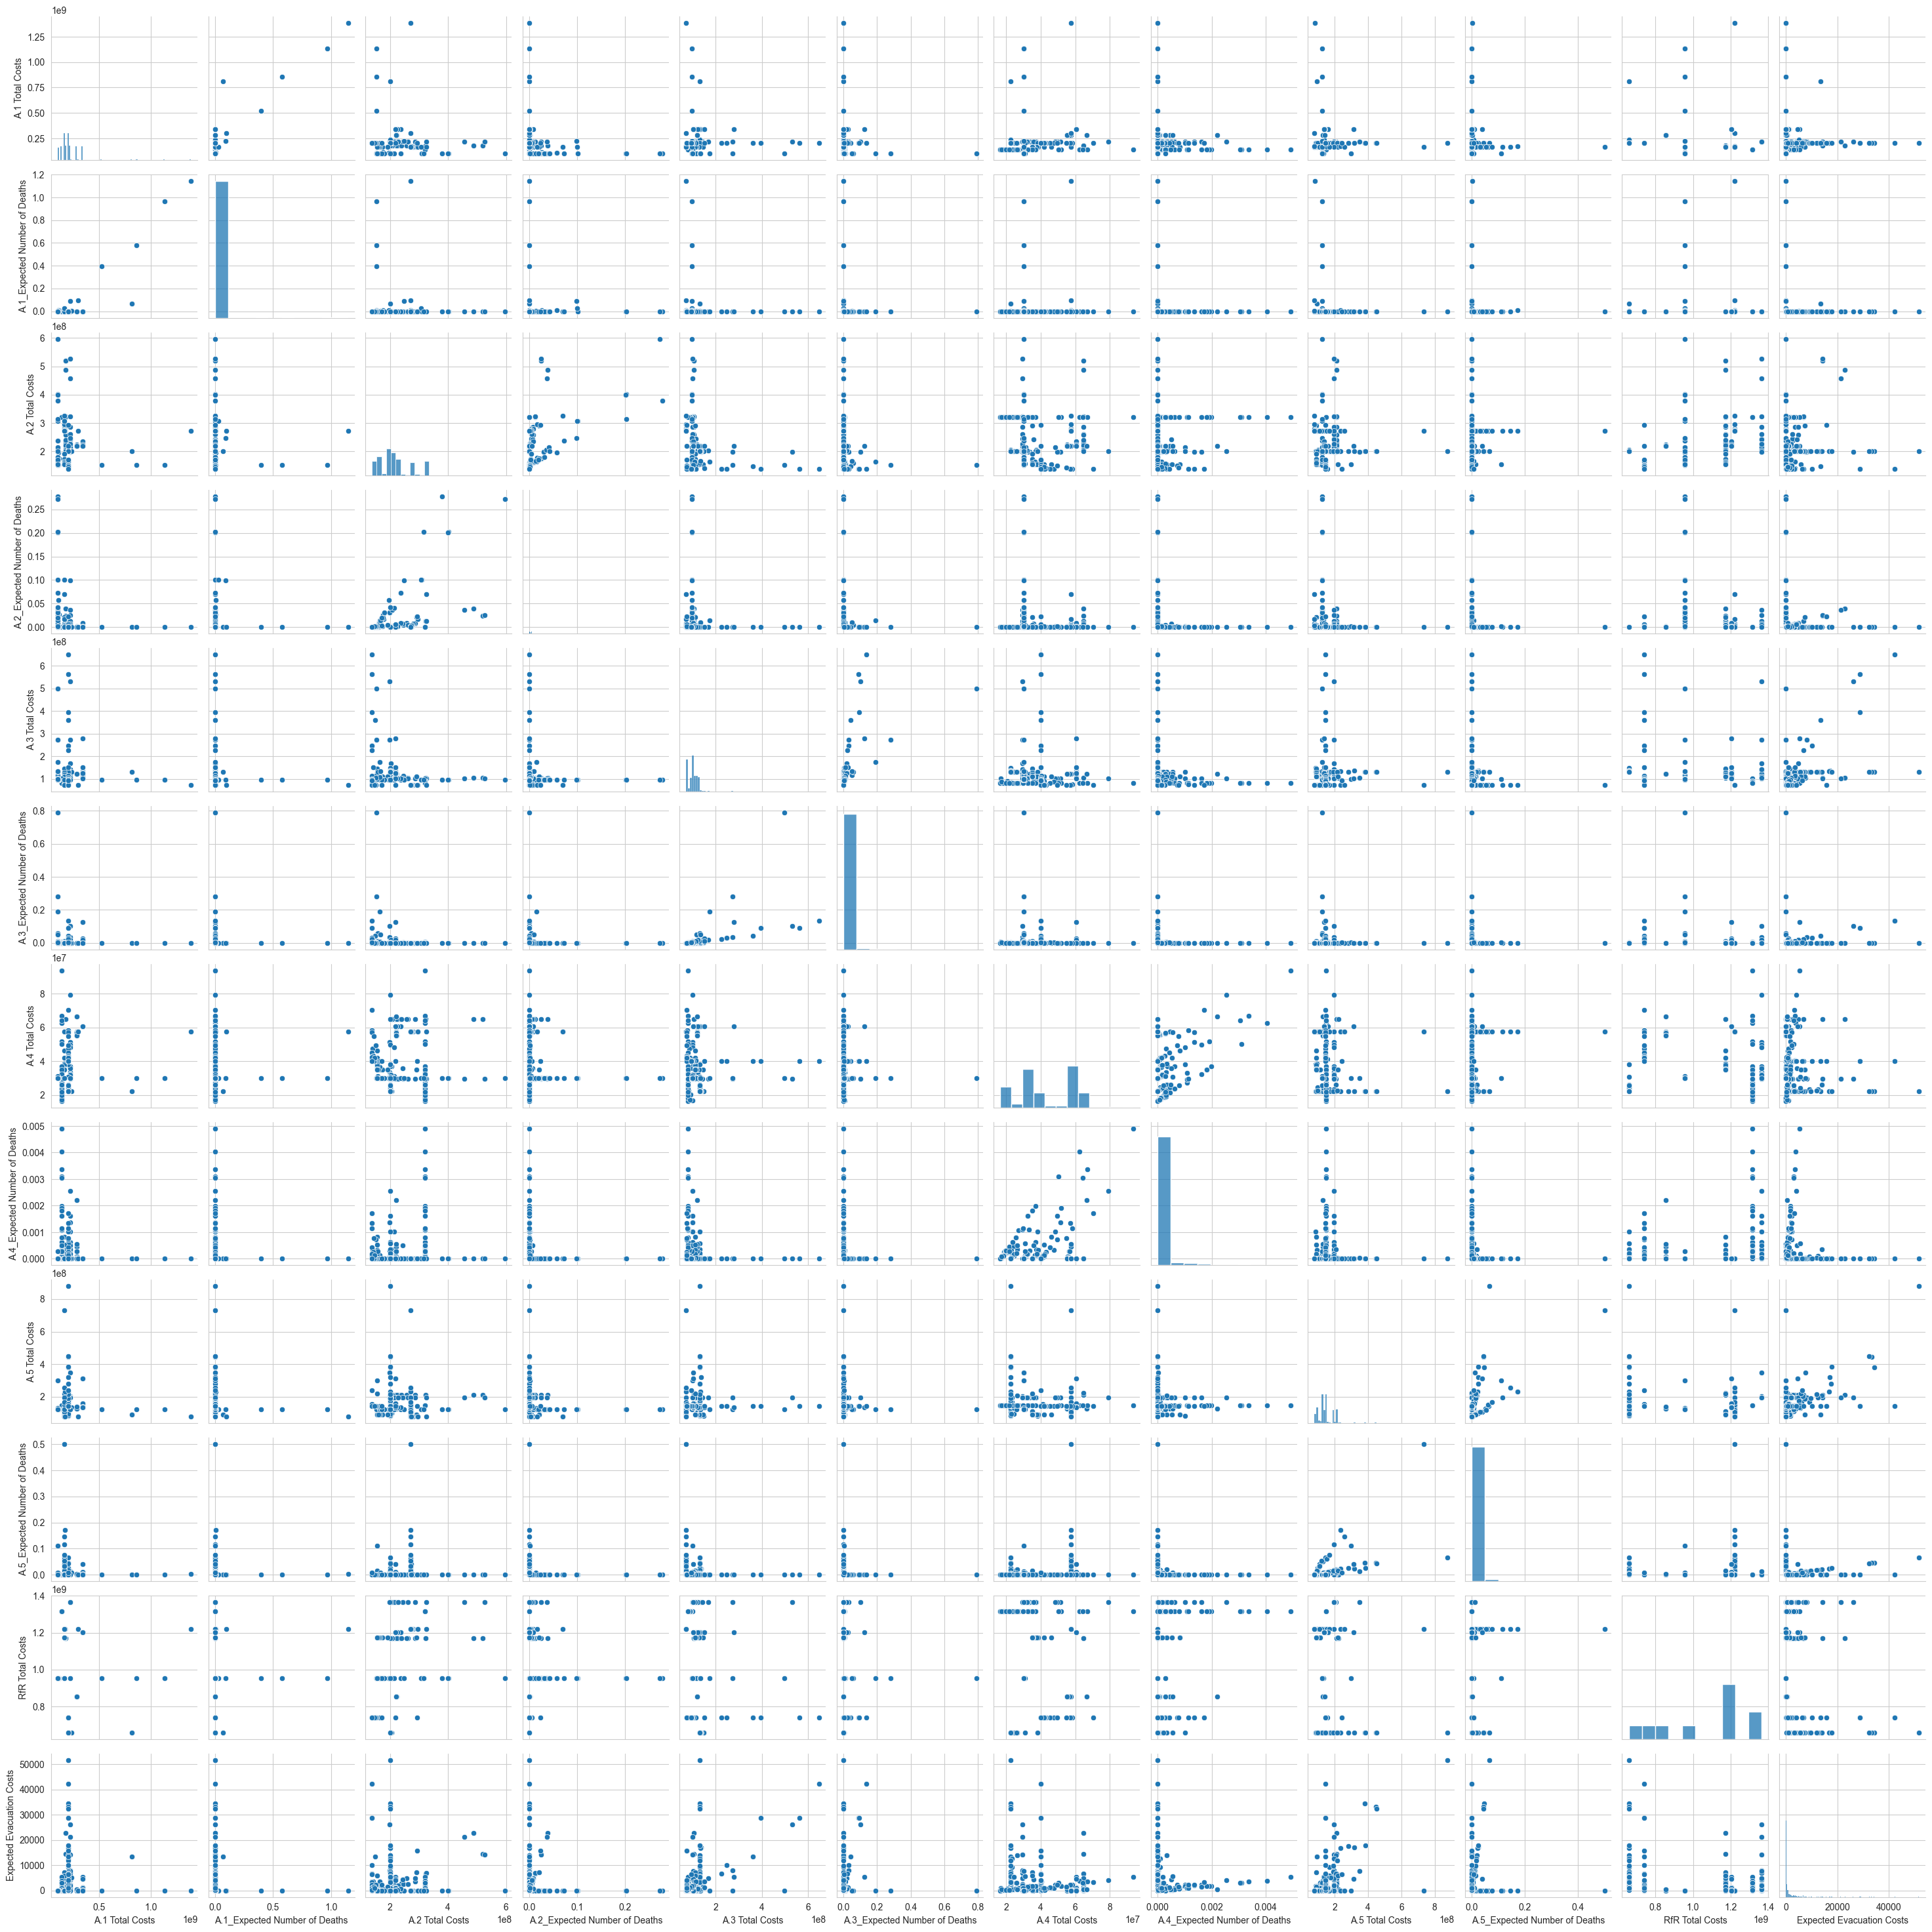

In [13]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()